<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Del-Rio-CAPE-and-CIN-(15-points)" data-toc-modified-id="Del-Rio-CAPE-and-CIN-(15-points)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Del Rio CAPE and CIN (15 points)</a></span><ul class="toc-item"><li><span><a href="#answer" data-toc-modified-id="answer-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>answer</a></span></li></ul></li><li><span><a href="#Cooling-problem-(12-points)" data-toc-modified-id="Cooling-problem-(12-points)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cooling problem (12 points)</a></span><ul class="toc-item"><li><span><a href="#answer" data-toc-modified-id="answer-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>answer</a></span></li></ul></li><li><span><a href="#Mixing-problem" data-toc-modified-id="Mixing-problem-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mixing problem</a></span><ul class="toc-item"><li><span><a href="#Answer" data-toc-modified-id="Answer-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Answer</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
#!conda install -y pytz

In [2]:
from a405.soundings.wyominglib import read_soundings
from a405.skewT.skewlib import makeSkewDry
from a405.thermo.thermlib import convertTempToSkew
import datetime
import pytz

soundings= read_soundings('delrio')
print(soundings.keys())
print(soundings['sounding_dict'].keys())

dict_keys(['filelist', 'attributes', 'input_args', 'file_dict', 'sounding_dict'])
dict_keys([(2017, 5, 1, 0), (2017, 5, 1, 12), (2017, 5, 2, 0), (2017, 5, 2, 12), (2017, 5, 3, 0), (2017, 5, 3, 12), (2017, 5, 4, 0), (2017, 5, 4, 12), (2017, 5, 5, 0), (2017, 5, 5, 12), (2017, 5, 6, 0), (2017, 5, 6, 12), (2017, 5, 7, 0), (2017, 5, 7, 12), (2017, 5, 8, 0), (2017, 5, 8, 12), (2017, 5, 9, 0), (2017, 5, 9, 12), (2017, 5, 10, 0), (2017, 5, 10, 12), (2017, 5, 11, 0), (2017, 5, 11, 12), (2017, 5, 12, 0), (2017, 5, 12, 12), (2017, 5, 13, 0), (2017, 5, 13, 12), (2017, 5, 14, 0), (2017, 5, 14, 12), (2017, 5, 15, 0), (2017, 5, 15, 12), (2017, 5, 16, 0), (2017, 5, 16, 12), (2017, 5, 17, 0), (2017, 5, 17, 12), (2017, 5, 18, 0)])


In [3]:
the_sounding=soundings['sounding_dict'][(2017,5,10,0)]

#  Del Rio CAPE and CIN (15 points)

The next page shows a temperature-dewpoint sounding for Del Rio,
Texas on May 10, 2017.

-   (4 points) On the sounding clearly show the following, using air
    from the surface at 1000 hPa as the cloudy updraft. For each
    quantity, list the mks units.

    -   LCL

    -   CAPE

    -   CIN

    -   LNB

-   (2 points) Use the tephigram to find the total liquid water
    mixing ratio $r_l$ (in g/kg) condensed in your parcel in its
    ascent from the LCL to the LNB.

-   (9 points) Show using pseudocode (or python or matlab or another
    computer language) how you would calculate the maximum vertical
    velocity of ascending adiabatic air and the height of the
    overshooting cloud top for this adiabatic parcel. Include in
    your description the variables you need to calculate and the
    equations you need to solve.



## answer

Condensed liquid water = 14 g/kg - approx 0.1 so about 14 g/kg



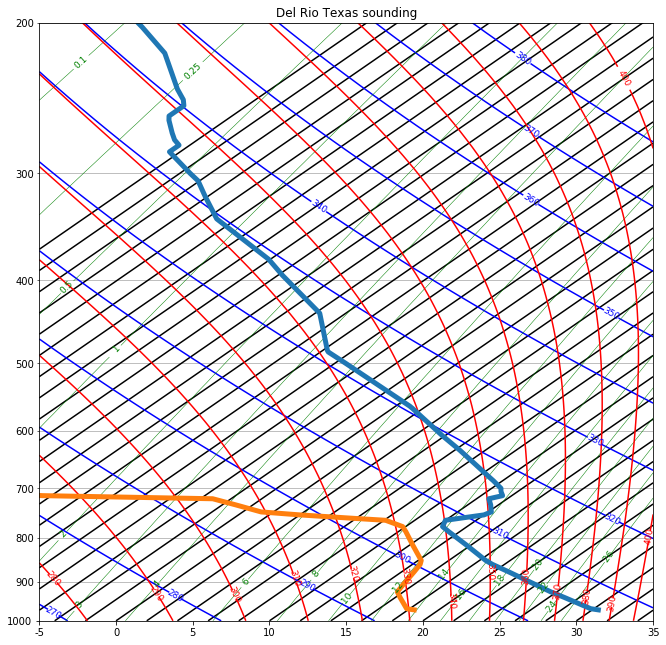

In [4]:
from a405.skewT.fullskew import makeSkewWet,find_corners,make_default_labels

def label_fun():
    """
    override the default rs labels with a tighter mesh
    """
    from numpy import arange
    #
    # get the default labels
    #
    tempLabels,rsLabels, thetaLabels, thetaeLabels = make_default_labels()
    #
    # change the temperature and rs grids
    #
    tempLabels = range(-40, 50, 2)
    rsLabels = [0.1, 0.25, 0.5, 1, 2, 3] + list(np.arange(4, 28, 2)) 
    return tempLabels,rsLabels, thetaLabels, thetaeLabels

skew=35.
temp=the_sounding['temp']
press = the_sounding['pres']
tdew = the_sounding['dwpt']
temp_skew = convertTempToSkew(temp,press,skew)
tdew_skew = convertTempToSkew(tdew,press,skew)

fig,ax =plt.subplots(1,1,figsize=(11,11))
corners = [-5, 35]
ax, skew = makeSkewWet(ax, corners=corners, skew=skew,label_fun=label_fun)
ax.set_title('Del Rio Texas sounding')
xcorners=find_corners(corners,skew=skew)
ax.set(xlim=xcorners,ylim=[1000,200])
l1=ax.plot(temp_skew,press,linewidth=5)
l2=ax.plot(tdew_skew,press,linewidth=5);
fig.savefig('delrio.pdf')

#  Cooling problem (12 points)

Use figure on the next page to calculate the following:

Air at 700 hPa has 7 g/kg of vapor and 1 g/kg of liquid.

-   (4 points) Find:

    -   The LCL of this air

    -   The approximate temperature if it was brought adiabatically
        to a pressure of 1000 hPa.

-   (8 points) Suppose this air was cooled by 10 degrees C at a
    constant pressure of 700 hPa. Find:

    -   The amount of liquid water condensed by the cooling (g/kg)

    -   The new LCL, assuming no precipitation

    -   The amount of energy $\Delta q_{out}$ (J/kg) shed to the
        environment during the cooling.


## answer

new lcl is about 850 hPa

temp at surface the same as $\theta$ at lcl = 303 K

cool by 10 K from about + 3 deg C to about -7 deg C, so rsat drops from 7 g/kg to about 3.5 g/kg

$\Delta q = \Delta h_m = c_p \Delta T + l_v \Delta r_v$ = 1004.*10 + 2.5e6 *3.5e-3 =about 19,000 J/kg

In [1]:
1004*10 + 2.5e6*3.5e-3

18790.0

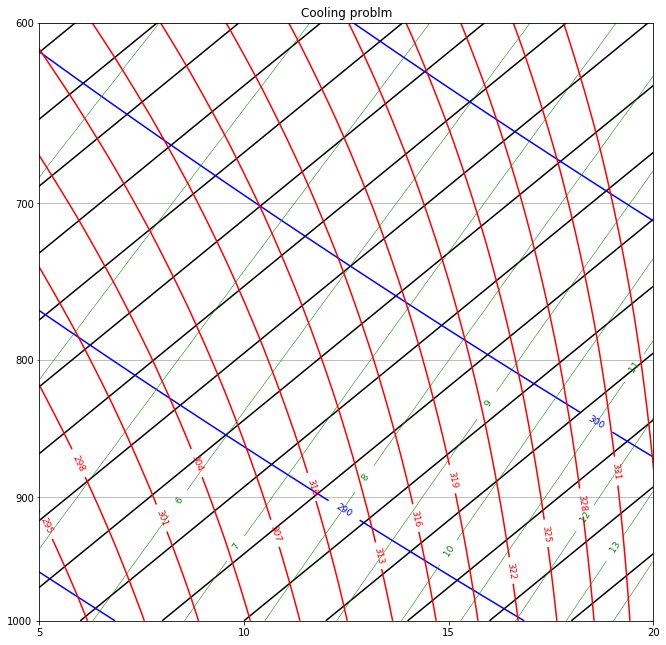

In [5]:
def label_fun():
    """
    override the default rs labels with a tighter mesh
    """
    from numpy import arange
    #
    # get the default labels
    #
    tempLabels,rsLabels, thetaLabels, thetaeLabels = make_default_labels()
    #
    # change the temperature and rs grids
    #
    tempLabels = range(-40, 50, 2)
    rsLabels = [0.1, 0.25, 0.5, 1, 2, 3] + list(np.arange(4, 28, 1)) 
    thetaeLabels = np.arange(295,335,3)
    return tempLabels,rsLabels, thetaLabels, thetaeLabels

fig,ax =plt.subplots(1,1,figsize=(11,11))
ax, skew = makeSkewWet(ax, corners=corners, skew=skew,label_fun=label_fun)
ax.set_title('Cooling problm')
corners=[5,20]
xcorners=find_corners(corners,skew=skew)
ax.set(xlim=xcorners,ylim=[1000,600])
fig.savefig('cooling.pdf')

# Mixing problem
Use pseudo-code to describe how you would calculate the temperature,
$T$ and water mixing ratios $r_v$ and $r_l$ of a mixture of cloud
and environment, given the pressure of the mixing level, the
temperature $T$, $r_v$ and $r_l$ of each parcel and the fraction $f$
of the environment in the final mixture. Specifiy the equations you
are solving, and the technique (rootfinding, integration, ode
solver). Feel feel use python functions that have been used in
class, but describe explicitly what those functions do.


## Answer

mix two conserved variables,  $r_T$ for water and either $h_m$ or $\log \theta_e$ (or $\theta_e$ approximately)

$\theta_{emix} = (1-f) \theta_{ecld} + f \theta_e$

$r_{Tmix} = (1 -f) r_{Tcld} + f r_{Tenv}$

Then rootfind with the target $\theta_{emix}$ to find $T_{mix}$
